<a href="https://colab.research.google.com/github/jannaelalawy/Order-Service/blob/main/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from zipfile import ZipFile
from PIL import Image
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import collections
from google.colab.patches import cv2_imshow
import glob
from skimage.transform import resize
import tensorflow as tf


In [ ]:
train_ds= tf.keras.utils.image_dataset_from_directory('data/',validation_split=0.2,subset='training',seed=123,image_size=(338,338),batch_size=2)

Found 19 files belonging to 5 classes.
Using 16 files for training.


In [ ]:
val_ds= tf.keras.utils.image_dataset_from_directory('data/',validation_split=0.2,subset='validation',seed=123,image_size=(338,338),batch_size=2)

Found 19 files belonging to 5 classes.
Using 3 files for validation.


In [ ]:
train_ds

<_BatchDataset element_spec=(TensorSpec(shape=(None, 338, 338, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

Extracting the train and test datasets

In [ ]:
TrainFile = "/content/data.zip"

with ZipFile(TrainFile, 'r') as zip:
	zip.printdir()
	print('Extracting all the files now...')
	zip.extractall()
	print('Done!')

File Name                                             Modified             Size
data/farida/                                   2023-05-04 16:55:14            0
data/farida/10.jpeg                            2023-04-29 17:32:36       154769
data/farida/8.jpeg                             2023-04-29 17:32:44       191340
data/farida/WhatsApp Image 2023-05-04 at 3.35.40 PM.jpeg 2023-05-04 15:38:24        67007
data/farida/WhatsApp Image 2023-05-04 at 3.41.09 PM.jpeg 2023-05-04 15:41:30       243209
data/jumana/                                   2023-05-04 15:38:06            0
data/jumana/5.jpeg                             2023-04-29 17:34:02        91490
data/jumana/6.jpeg                             2023-04-29 17:34:02        72694
data/jumana/7.jpeg                             2023-04-29 17:34:02        82340
data/jumana/WhatsApp Image 2022-02-18 at 5.57.32 PM.jpeg 2022-02-18 19:03:42       160873
data/jumana/WhatsApp Image 2023-01-26 at 3.10.28 AM.jpeg 2023-01-26 04:10:48       145507


Haar Cascade function: takes an image finds the faces and returns them cropped 


In [ ]:
def haarCascade(img):
 face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
 eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
 gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
 faces = face_cascade.detectMultiScale(gray, 1.3, 5,minSize=(30, 30))
 
 for (x,y,w,h) in faces:
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
    roi_color = img[y:y+h, x:x+w]
    newimg=np.array(roi_color)
    return newimg


In [ ]:
path = "/content/data/*/*"
arr=[]
target_face_size=(388,388)

for file in glob.glob(path):
  if('jumana' in file):
    mytuple=(resize(haarCascade(cv2.imread(file)), target_face_size),'jumana')
    arr.append(mytuple)
  elif('farida' in file):
    mytuple=(resize(haarCascade(cv2.imread(file)), target_face_size),'farida')
    arr.append(mytuple)
  elif('maher'in file):
    mytuple=(resize(haarCascade(cv2.imread(file)),target_face_size),'maher')
    arr.append(mytuple)
  elif('khaled'in file):
    mytuple=(resize(haarCascade(cv2.imread(file)),target_face_size),'khaled')
    arr.append(mytuple)
  elif('kroush'in file):
    mytuple=(resize(haarCascade(cv2.imread(file)),target_face_size),'kroush')
    arr.append(mytuple)

   
df = pd.DataFrame(arr,columns=['Image', 'label'])
df

,Image,label
0,"[[[0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0,...",farida
1,"[[[1.4157049750033398e-06, 0.9999993882756281,...",farida
2,"[[[2.014554801044556e-06, 0.9999926003852498, ...",farida
3,"[[[0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0,...",farida
4,"[[[0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0,...",jumana
5,"[[[0.0, 1.0, 0.0], [0.0, 1.0, 0.0], [0.0, 1.0,...",jumana
6,"[[[9.404875252516209e-25, 1.0, 1.4587153452882...",jumana
7,"[[[8.455598692295072e-24, 0.9999999999999998, ...",jumana
8,"[[[3.645986932191094e-12, 0.9999999999926645, ...",jumana
9,"[[[0.0, 0.9999999999999998, 0.0], [0.0, 0.9999...",kroush


In [ ]:
for i in range(18):
 print(df.Image[i].shape)

(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)
(388, 388, 3)


**CNN**

In [ ]:

import warnings
# filter warnings
warnings.filterwarnings('ignore')


In [ ]:
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import numpy as np
import cv2
import seaborn as sns
import matplotlib.pyplot as plt

# # Set the image dimensions
# IMG_HEIGHT = 388
# IMG_WIDTH = 388
# IMG_CHANNELS = 3


# Prepare the data
X = df['Image'].to_list()
y = df['label'].to_list()

# Encode the labels as integers
le = LabelEncoder()
y = le.fit_transform(y)


In [ ]:
import tensorflow as tf
# Convert the NumPy array to a TensorFlow tensor
y_tensor = tf.convert_to_tensor(y)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(338, 338, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(le.classes_), activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
train_np=list(train_ds)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# Train the model
history = model.fit(train_ds,validation_data=val_ds, epochs=5)

Epoch 1/10
8/8 [==============================] - 13s 1s/step - loss: 734.5878 - accuracy: 0.1875 - val_loss: 143.3201 - val_accuracy: 0.3333
Epoch 2/10
8/8 [==============================] - 10s 1s/step - loss: 52.9948 - accuracy: 0.1875 - val_loss: 5.3622 - val_accuracy: 0.3333
Epoch 3/10
8/8 [==============================] - 10s 1s/step - loss: 2.1121 - accuracy: 0.6250 - val_loss: 2.4877 - val_accuracy: 0.3333
Epoch 4/10
8/8 [==============================] - 10s 1s/step - loss: 2.9882 - accuracy: 0.6250 - val_loss: 1.8079 - val_accuracy: 0.3333
Epoch 5/10
8/8 [==============================] - 10s 1s/step - loss: 1.2745 - accuracy: 0.8750 - val_loss: 12.4677 - val_accuracy: 0.6667
Epoch 6/10
8/8 [==============================] - 10s 1s/step - loss: 9.5679 - accuracy: 0.8125 - val_loss: 49.8046 - val_accuracy: 0.0000e+00
Epoch 7/10
8/8 [==============================] - 10s 1s/step - loss: 12.5326 - accuracy: 0.7500 - val_loss: 12.9372 - val_accuracy: 0.3333
Epoch 8/10
8/8 [=====

In [ ]:
pred = model.predict(train_ds)
tf.where(pred < 0.5 , 0 , 1)

8/8 [==============================] - 2s 180ms/step


<tf.Tensor: shape=(16, 5), dtype=int32, numpy=
array([[1, 0, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]], dtype=int32)>

Calculating the loss and accuracy curves 

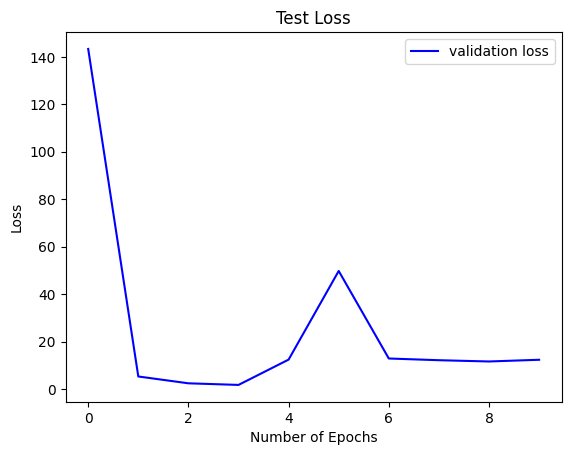

In [ ]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()